In [404]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sympy as sp

In [338]:
import warnings
warnings.filterwarnings('ignore')

### Fig.1

In [254]:

gamma1p = 0 * 2 * np.pi    # dissipation rate
gamma1m = 0 * 2 * np.pi
gamma2 = 0.0001 * 2 * np.pi
N = 10                 # number of resonator dimensions

# resonator operators
a  = destroy(N)


In [255]:
c_op_list = []

rate = gamma1p
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())
    
rate = gamma1m   
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = gamma2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a**2)


In [256]:
xlist = np.empty((0,301))
alist = np.empty((0,301))
psi0 = basis(N,0)

for omega in np.linspace(0,0.0003,301):
    xlist = np.append(xlist, omega* 2 * np.pi/gamma2)
    H = 1j*omega* 2 * np.pi*(a.dag()-a)          #not to be replaced by omega * a.dag * a
    rho_ss = steadystate(H, c_op_list)
    aexpt = expect(a, rho_ss)
    alist = np.append(alist,aexpt)

In [257]:
chi_q = np.diff(alist)/np.diff(xlist)
chi_c = np.diff(xlist**(1/3))/np.diff(xlist)

<IPython.core.display.Javascript object>


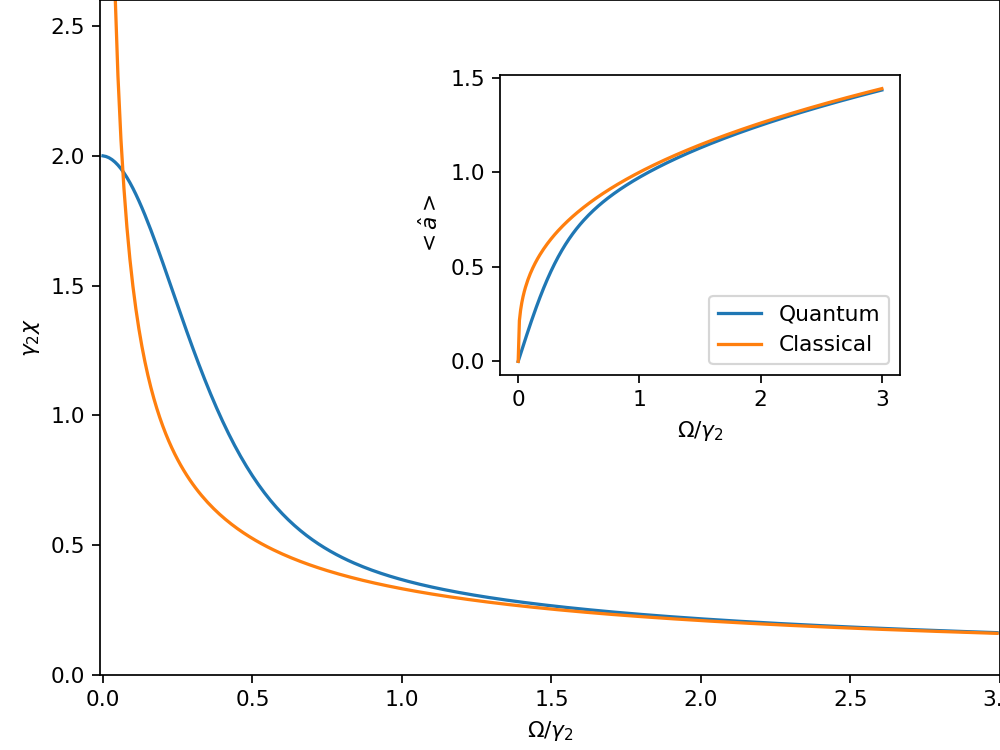

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [259]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.9,0.9])
ax2 = fig1.add_axes([0.5,0.5,0.4,0.4])

ax1.set_ylim([0,2.6])
ax1.set_xlim([-0.01,3])
ax1.plot(xlist[:-1], chi_q,label='Quantum')
ax1.plot(xlist[:-1],chi_c,label='Classical')
ax1.set_xlabel('$\Omega/\gamma_2$')
ax1.set_ylabel('$\gamma_2 \chi$')

ax2.plot(xlist, alist,label='Quantum')
ax2.plot(xlist,xlist**(1/3),label='Classical')
ax2.set_xlabel('$\Omega/\gamma_2$')
ax2.set_ylabel('$<\hat{a}>$')
ax2.legend()

In [258]:
fig1.savefig('fig1')

### Fig.2

In [419]:

gamma1p = 0     # dissipation rate
gamma1m = 0
gamma2 = 0.001 * 2 * np.pi

N = 20                # number of cavity fock states

# operators
a  = destroy(N)


In [420]:
xlist1 = np.empty((0,101))
chilist1 = np.empty((0,101))

for r in np.linspace(0,4,101):
    xlist1 = np.append(xlist1, r)
    gamma1p = r*gamma2
    c_op_list = []
    rate = gamma1p
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a**2)
        
    alist = np.empty((0,101))
    wlist = np.empty((0,101))
        
    for omega in np.linspace(0,0.0001,101):
        wlist = np.append(wlist,omega)
        H = 1j*omega *(a.dag()-a)         
        rho_ss = steadystate(H, c_op_list)
        aexpt = expect(a, rho_ss)
        alist = np.append(alist, aexpt)
        chi_q = np.diff(alist)/np.diff(wlist)      
        
    chilist1 = np.append(chilist1,gamma2*chi_q[0])

In [416]:
gamma1p = 0

xlist2 = np.empty((0,101))
chilist2 = np.empty((0,101))

for r in np.linspace(0,4,101):
    xlist2 = np.append(xlist2, r)
    gamma1m = r*gamma2
    c_op_list = []
    rate = gamma1m
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)
                         
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a**2)
        
    alist = np.empty((0,101))
    wlist = np.empty((0,101))
        
    for omega in np.linspace(0,0.0001,101):
        wlist = np.append(wlist,omega)
        H = 1j*omega *(a.dag()-a)         
        rho_ss = steadystate(H, c_op_list)
        aexpt = expect(a, rho_ss)
        alist = np.append(alist, aexpt)
        chi_q = np.diff(alist)/np.diff(wlist)      
        
    chilist2 = np.append(chilist2,gamma2*chi_q[0])

In [423]:
x1 = np.linspace(0,4,101)
#y1 = 2/(9*x1)
x2 = np.linspace(-4,0,101)
#y2 = -2/x2
y3 = -2/x2
y4 = 1/(x1)

<IPython.core.display.Javascript object>


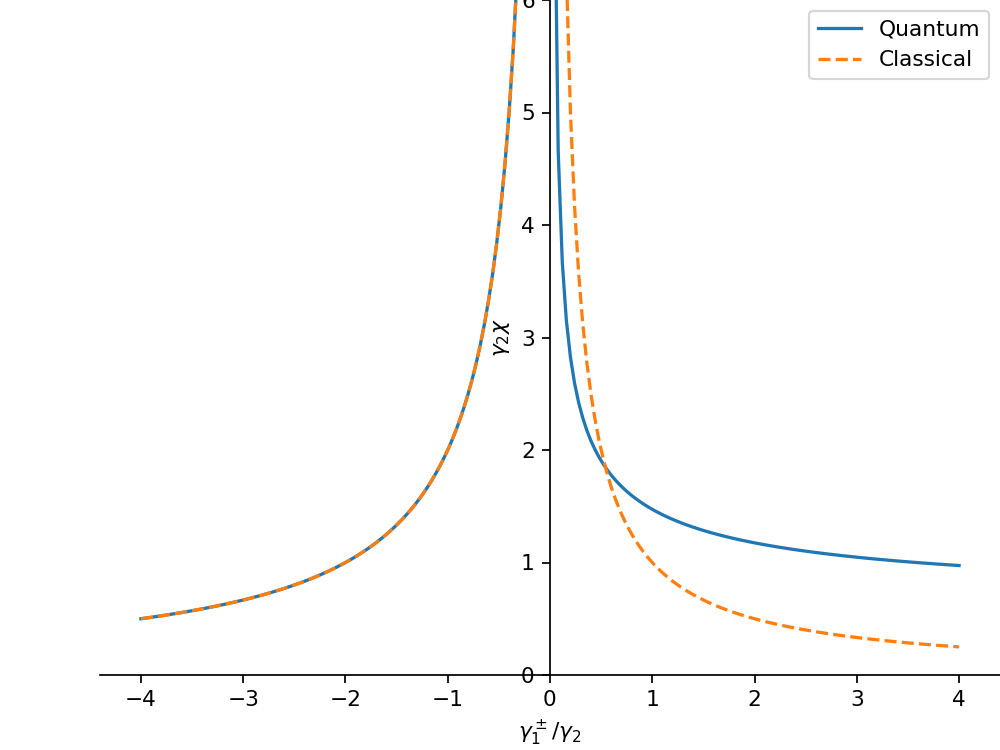

In [424]:
fig2_1 = plt.figure()
ax = fig2_1.add_axes([0.1,0.1,0.9,0.9])
ax.set_ylim([0,6])
ax.plot(xlist1[1:], chilist1[1:],color='#1f77b4', label='Quantum')
ax.plot(-xlist2[1:], chilist2[1:],color='#1f77b4')
ax.plot(x1,y4,color='#ff7f0e',linestyle='--',label = 'Classical')
ax.plot(x2,y3,color='#ff7f0e',linestyle='--')

ax.set_xlabel('$\gamma_1^\pm/\gamma_2$')
ax.set_ylabel('$\gamma_2 \chi$')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

In [332]:
w, g1p, g1m, g2 = sp.symbols('\Omega, \gamma_1^+, \gamma_1^- \gamma_2', real='True')
f = 2*w/g2*((g1p+g1m)*g2+8*w**2)/((3*g1p+g1m)**2+8*w**2)
f

2*\Omega*(8*\Omega**2 + \gamma_2*(\gamma_1^+ + \gamma_1^-))/(\gamma_2*(8*\Omega**2 + (3*\gamma_1^+ + \gamma_1^-)**2))

In [337]:
d = sp.diff(f,w)

In [335]:
d.subs([(w,0),(g1m,0)])

2/(9*\gamma_1^+)

In [336]:
d.subs([(w,0),(g1p,0)])

2/\gamma_1^-

### Fig.3

In [33]:
gamma1m = 0.02*gamma2

In [34]:
c_op_list = []

rate = gamma1p
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())
    
rate = gamma1m   
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = gamma2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a**2)


In [14]:
xlist = np.empty((0,901))
alist = np.empty((0,901))
psi0 = basis(N,0)

for omega in np.linspace(0,0.003,901):
    xlist = np.append(xlist, omega* 2 * np.pi/gamma2)
    H = 1j*omega* 2 * np.pi*(a.dag()-a)
    rho_ss = steadystate(H, c_op_list)
    aexpt = expect(a, rho_ss)
    alist = np.append(alist,aexpt)

In [15]:
N=3
a = destroy(N)

c_op_list = []

rate = gamma1p
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())
    
rate = gamma1m   
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = gamma2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a**2)


In [17]:
xlist_3lv = np.empty((0,901))
alist_3lv = np.empty((0,901))
psi0 = basis(N,0)

for omega in np.linspace(0,0.003,901):
    xlist_3lv = np.append(xlist_3lv, omega* 2 * np.pi/gamma2)
    H = 1j*omega* 2 * np.pi*(a.dag()-a)
    rho_ss = steadystate(H, c_op_list)
    aexpt = expect(a, rho_ss)
    alist_3lv = np.append(alist_3lv,aexpt)

<IPython.core.display.Javascript object>


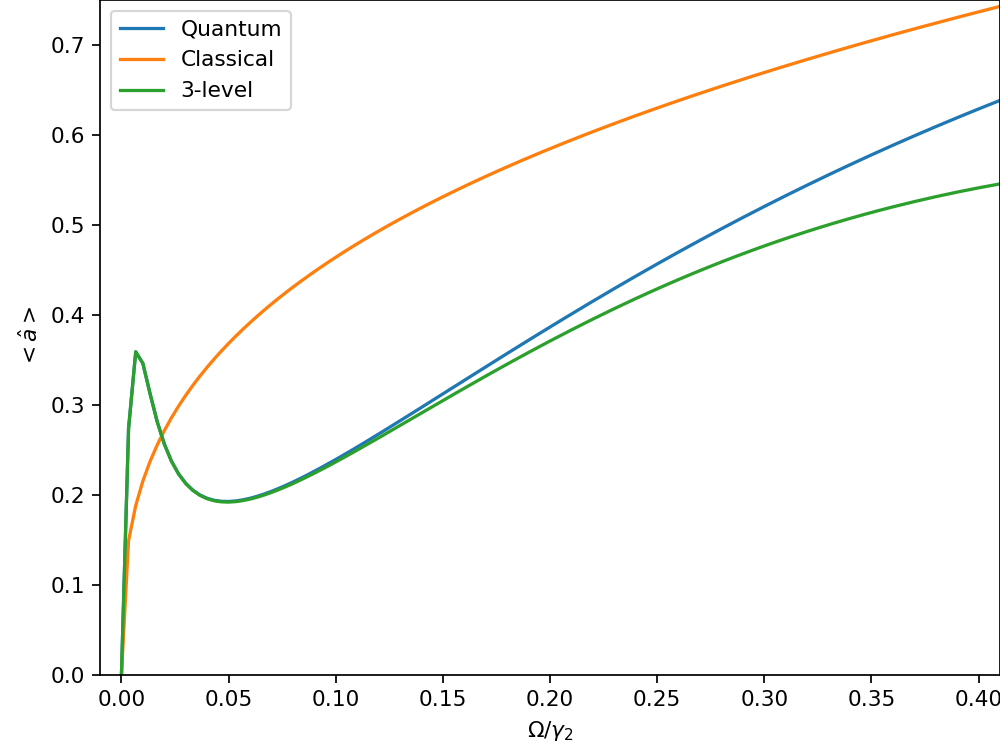

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [18]:
fig3 = plt.figure()
ax = fig3.add_axes([0.1,0.1,0.9,0.9])

ax.plot(xlist,xlist**(1/3),label='Classical')
ax.plot(xlist, alist,label='Quantum')
ax.plot(xlist_3lv, alist_3lv, label='3-level')
ax.set_xlim([-0.01,0.41])
ax.set_ylim([0,0.75])
ax.set_xlabel('$\Omega/\gamma_2$')
ax.set_ylabel('$<\hat{a}>$')
ax.legend()

<IPython.core.display.Javascript object>


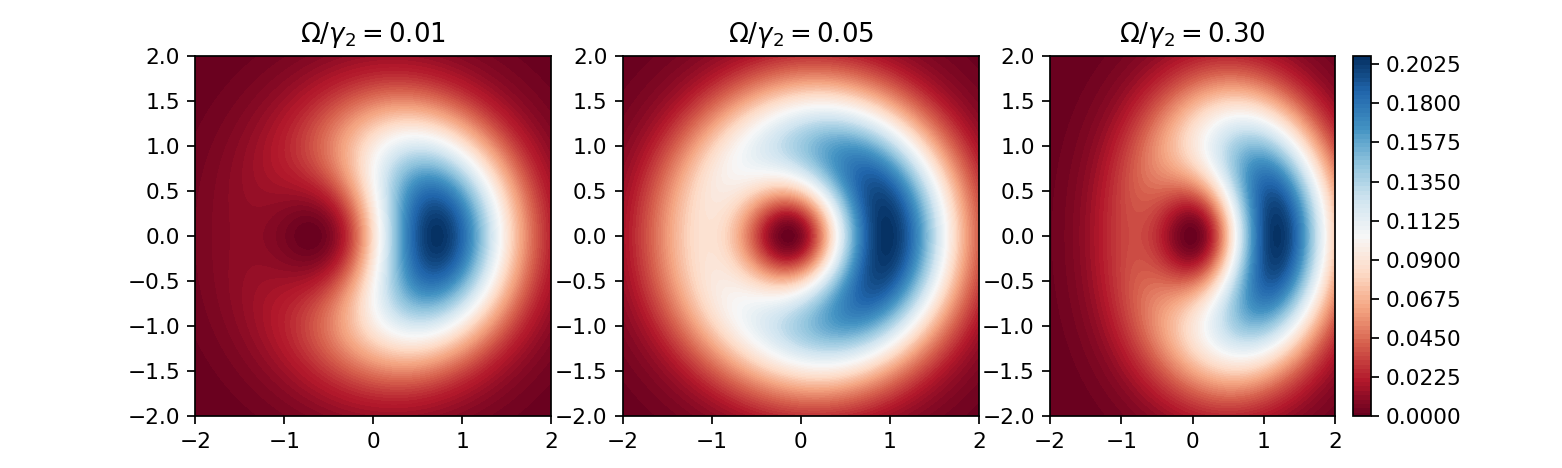

In [58]:
xvec = np.linspace(-2,2,100)

fig4,ax = plt.subplots(1,3,figsize=(10,3))

i=0
for r in [0.01,0.05,0.3]:
    omega = r*gamma2
    H = 1j*omega*(a.dag()-a)
    rho_ss = steadystate(H, c_op_list)
    W =wigner(rho_ss,xvec,xvec)
    p = ax[i].contourf(xvec, xvec, W, 100, cmap=plt.get_cmap('RdBu'))
    ax[i].set_title(r"$\Omega/\gamma_2=%.2f $" % (r))
    i=i+1
    
cb = fig4.colorbar(p, ax=ax[2])

### Fig.4

<IPython.core.display.Javascript object>


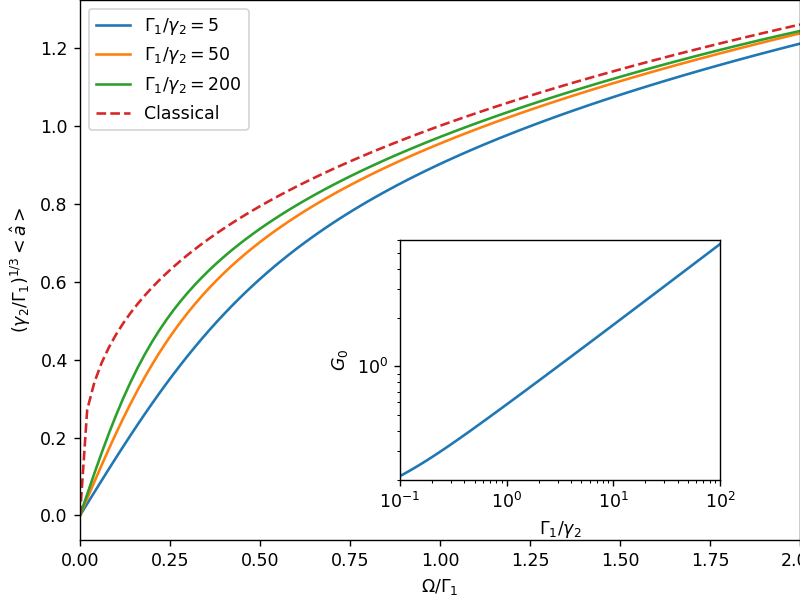

In [409]:
gamma2 = 0.0001*2*np.pi
N = 100                # number of cavity fock states

# operators
a  = destroy(N)

fig5 = plt.figure()
ax1 = fig5.add_axes([0.1,0.1,0.9,0.9])
ax1.set_xlim([0,2])

for r in [5,50,200]:
    xlist = np.empty((0,1001))
    alist = np.empty((0,1001))
    gamma1 = r*gamma2
    gamma1p = gamma1
    gamma1m = gamma1
    
    c_op_list = []

    rate = gamma1p
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())
    
    rate = gamma1m   
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)

    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a**2)
        
    for m in np.linspace(0,2,101):
        xlist = np.append(xlist, m)
        H = 1j*m*gamma1*(a.dag()-a)          #not to be replaced by omega * a.dag * a
        rho_ss = steadystate(H, c_op_list)
        aexpt = expect(a, rho_ss)
        alist = np.append(alist,r**(-1/3)*aexpt)
    
    ax1.plot(xlist, alist,label='$\Gamma_1/\gamma_2 = %.0f$' %(r))

ax1.set_xlabel('$\Omega/\Gamma_1$')
ax1.set_ylabel('$(\gamma_2/\Gamma_1)^{1/3}<\hat{a}>$')
ax1.plot(xlist,xlist**(1/3),linestyle='--', label='Classical')
ax1.legend()

In [410]:


xlist = np.empty((0,100))
chilist = np.empty((0,100))

for r in np.logspace(-1,2,num=100):
    xlist = np.append(xlist, r)
    gamma1 = r*gamma2
    gamma1p = gamma1
    gamma1m = gamma1
    chi_p = 2/gamma1m
    
    c_op_list = []
    rate = gamma1p
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a.dag())
    rate = gamma1m   
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a)
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a**2)
        
    alist = np.empty((0,101))
    wlist = np.empty((0,101))
        
    for omega in np.linspace(0,0.0001,101):
        wlist = np.append(wlist,omega)
        H = 1j*omega *(a.dag()-a)         
        rho_ss = steadystate(H, c_op_list)
        aexpt = expect(a, rho_ss)
        alist = np.append(alist, aexpt)
        chi_q = np.diff(alist)/np.diff(wlist)      
        
    chilist = np.append(chilist,chi_q[0]/chi_p)

In [411]:

ax2 = fig5.add_axes([0.5,0.2,0.4,0.4])


ax2.plot(xlist,chilist)
ax2.set_xlabel('$\Gamma_1/\gamma_2$')
ax2.set_ylabel('$G_0$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,100])
ax2.set_ylim([0.2,6])


(0.2, 6)

### Fig.5

In [312]:
gamma1p = 50*gamma2
gamma1m = 20*gamma2

c_op_list = []

rate = gamma1p
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())
    
rate = gamma1m   
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = gamma2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a**2)

<IPython.core.display.Javascript object>


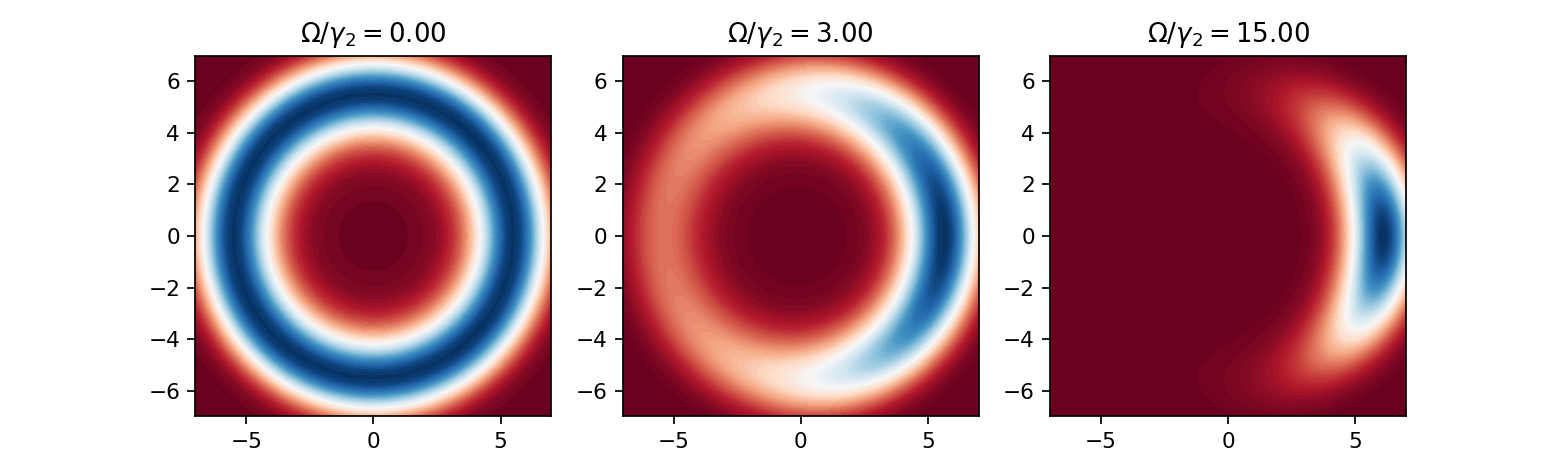

In [317]:
xvec = np.linspace(-7,7,100)

fig4,ax = plt.subplots(1,3,figsize=(10,3))

i=0
for r in [0,3,15]:
    omega = r*gamma2
    H = 1j*omega*(a.dag()-a)
    rho_ss = steadystate(H, c_op_list)
    W =wigner(rho_ss,xvec,xvec)
    p = ax[i].contourf(xvec, xvec, W, 100, cmap=plt.get_cmap('RdBu'))
    ax[i].set_title(r"$\Omega/\gamma_2=%.2f $" % (r))
    i=i+1
    
#cb = fig4.colorbar(p, ax=ax[2])